In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Cuadrados Mínimos

Las ecuaciones del tipo $Ax = b$ con $A \in \mathbb{R}^{n × n}, \ x \in \mathbb{R}^n$ y $b \in \mathbb{R}^n$ es muy probable que no tengan solución, por lo que debemos hallar algo cercano a la misma sin deshacernos de ecuaciones. Buscamos entonces la que "menos le pifie". \
A esta solución la llamaremos $\tilde{x}$ y va a ser: \
$\hspace{8cm} \tilde{x} = \underset{x \in \mathbb{R}^n}{\text{arg min}} \{||Ax - b||_2^2\}$

Es decir, no pudimos hacer que $Ax - b = \vec{0}$ pero intentamos acercarnos lo máximo que podamos.

$\underline{Proposición}:$ dadas la matriz $A \in \mathbb{R}^{n×n}$, y el vector $b \in \mathbb{R}^n$, la solución del problema de mínimos cuadrados $\underset{x \in \mathbb{R}^n}{\text{arg min}} \{||Ax - b||_2^2\}$ es la solución al problema: $A^tAx = A^tb$.

Sin embargo, en la práctica, no es un método utilizado para resolver un problema de cuadrados mínimos pues utilizar la ecuación normal vuelve al problema súper inestable, no deseable para resolver computacionalmente. \
Esta inestabilidad proviene de que no podemos controlar $cond(A^tA)$:  
- Si $A$ es de rango completo (supongamos $m>n, \ rk(A) = n$), entonces $A^tA$ es definida positiva y por ende inversible:
  - $x^tA^tAx =(Ax)^tAx =∥Ax∥_2^2 > 0$ pues $Ax \neq 0$ para $x \neq 0$, pues $A$ es de rango completo. \

 De la definida positividad de $A$, se desprende que todos sus autovalores son positivos. \
 Entonces, se puede expresar el número de condición como: \
 $cond_2(A^tA) = \frac{\lambda_1(A^tA)}{\lambda_n(A^tA)} = \frac{\sigma_1^2(A)}{\sigma_n^2(A)} = cond_2(A)^2$

 Esto implica que, si $A$ es de rango completo, utilizar la ecuación normal eleva al cuadrado la condición del problema.


 - Si $A$ no fuera de rango completo, entonces $cond_2(A) = +\infty $, lo que implica que $cond_2(A^tA) = +\infty$

\

 En la práctica, en cambio, una opción es usar la descomposición $QR$ de la matriz, donde $Q \in \mathbb{R}^{m \times n}$ es ortogonal y $R \in \mathbb{R}^{n \times n}$ es triangular superior.


 Luego, se puede ver que, tomando $A = QR$ :

 $||Ax - b||_2 = ||Q^t(Ax - b)||_2 = ||Q^tQRx - Q^tb||_2 = ||Rx - Q^tb||_2$

\

Es entonces que resolver el sistema $Rx = Q^tb$ es también una solución del problema de mínimos cuadrados.

Analizo entonces el número de condición del sistema para evaluar la estabilidad del problema.

Las matrices $R$ y $A$ poseen el mismo número de condición, pues planteando $R = Q^tA$, nos queda que si tomamos $A = U\Sigma V^t$, la descomposición en valores singulares de $A$, donde en la diagonal de $\Sigma$ se hayan sus valores singulares, entonces: \
$R = Q^tA = Q^tU\Sigma V^t = \tilde{U}\Sigma V^t$ donde la diagonal de $\Sigma$ posee los valores singulares de $R$.


Esto se traduce en que $cond_2(R) = \frac{\sigma_1(R)}{\sigma_n(R)} = \frac{\sigma_1(A)}{\sigma_n(A)} = cond_2(A)$

\

Esta es solo una de las posibles opciones alternativas de resolver el sistema, hay varias más (como la utilización de una descomposición en valores singulares "truncada" de $A$), pero este método logra reducir las complejidades en cada parte del proceso:


\begin{array}{|c|c|c|c|c|}
\hline
Método & Formación & Resolución & Complejidad \ total & Estabilidad \\
\hline
\text{Ecuaciones normales} & A^tA \ \text{y} \ A^tb : O(mn^2) & O(n^3) & O(mn^2 + n^3) & cond_2(A^tA) = cond_2(A^tA)^2 \\
\text{Descomposición QR} & A = QR : O(mn^2) & O(n^2) & O(mn^2) & cond_2(R) = cond_2(A) \\
\hline
\end{array}





###**Ejercicio cuadrados mínimos**

A los largo de los anos, en un río cercano a un complejo industrial se han tomado muestras de agua para medir la presencia de cierto contaminante. Los datos han sido resumidos en la siguiente tabla, donde $x$ representa el año desde el inicio de la toma de las muestras e $y$ representa la concentración del contaminante en $mg/L$:

| x  | 0.0  | 1.0  | 2.0  | 3.0  | 4.0  | 5.0  | 6.0  | 7.0  |
|----|------|------|------|------|------|------|------|------|
| y  | 0.13 | 0.68 | 1.49 | 1.60 | 1.85 | 1.96 | 2.20 | 2.27 |

a) Hallar el polinomio $f(x) = c_0+c_1x+c_2x^2$ que mejor ajusta a los datos en sentido de cuadrados mínimos. Graficar conjuntamente los datos y la función obtenida. \
b) Ajustar una función de la forma $g(x) = ln(d_0 + d_1x)$ aplicando cuadrados
mínimos sobre la función transformada convenientemente. Graficar conjuntamente los datos y la función obtenida. \
c) Para cada uno de los ajustes obtenidos, ¿cuánto contaminante se espera hallar
en el año 8?




###**Resolución**

$a)$ Me interesa hallar el polinomio $f(x) = c_0+c_1x+c_2x^2$ que mejor aproxime los datos de la tabla. Es decir, busco la combinación de parámetros $(c_0,c_1,c_2)$ tal que $\sum_{i=1}^8 ((\underbrace{c_0+c_1x_i+c_2x_i^2}_{\text{aproximación}}) - \underbrace{y_i}_{\text{real}})^2 \ $ sea lo más chico posible.

El problema también se puede ver como encontrar $c = (c_0,c_1,c_2)$ que minimice $||Ac - y||_2^2$, donde $A = \begin{bmatrix} 1 & x_1 & x_1^2 \\ 1 & x_2 & x_2^2 \\ . & . & . \\ . & . & . \\ . & . & . \\ 1 & x_8 & x_8^2 \end{bmatrix}$

Que, como hemos visto, si tomamos $A = QR$ su descomposición $QR$, es análogo a resolver el sistema $R \ c = Q^ty$ .

In [ ]:
## Escribo los vectores x e y
x = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0])
y = np.array([0.13, 0.68, 1.49, 1.60, 1.85, 1.96, 2.20, 2.27])

## Armo la matriz A
A = np.column_stack((np.ones_like(x), x, x**2))

## Calculo su descomposición QR
Q, R = np.linalg.qr(A)

## Calculo el vector c
c = np.linalg.solve(R, np.dot(Q.T, y))

## Finalmente, escribo la función f
print(f'La función de la forma c0 +c1x + c2x^2 que mejor aproxima los datos es f(x) = {c[0]} + {c[1]}x + {c[2]}x^2')


La función de la forma c0 +c1x + c2x^2 que mejor aproxima los datos es f(x) = 0.1825000000000007 + 0.6185714285714285x + -0.04714285714285717x^2


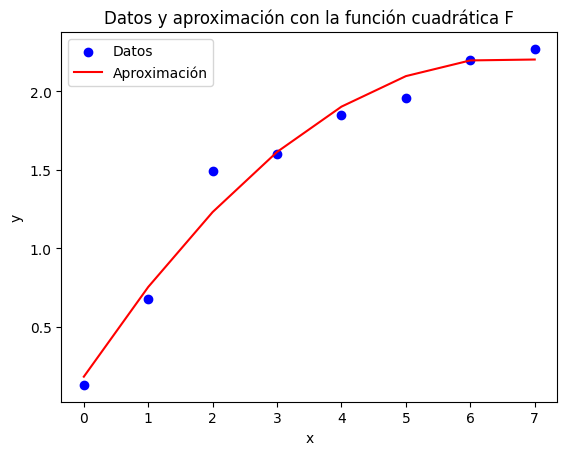

In [ ]:
## Grafico los datos de la tabla y la función de aproximación
plt.scatter(x, y, label='Datos', color = 'blue')
plt.plot(x, c[0] + c[1]*x + c[2]*x**2, label='Aproximación', color = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos y aproximación con la función cuadrática F')
plt.legend()
plt.show()

$b)$ Para hallar $d = (d_0,d_1)$ que mejor ajuste una función del estilo $g(x) = ln(d_0 + d_1x)$, lo que hago es linealizar la función para volver a aplicar ténicas de cuadrados mínimos.

Llamando $\tilde{g}(x) = e^{g(x)}$, obtengo: $\tilde{g}(x) = d_0 + d_1x$ , una función lineal en $x$.

Es entonces que puedo plantear el sistema $Ad = \tilde{y}$ donde $A = \begin{bmatrix} 1 & x_1 \\ . & . \\ . & . \\ . & . \\ 1 & x_8\end{bmatrix}$, $\tilde{y} = \begin{bmatrix} e^{y_1} \\ . \\ . \\ . \\ e^{y_8}\end{bmatrix}$

Lo que es análogo, si tomamos $A = QR$ , a resolver el sistema: $R \ d = Q^t\tilde{y}$.

In [ ]:
##Armo la segunda matriz A junto con la y_tilde
A_2 = np.column_stack((np.ones_like(x), x))
y_tilde = np.exp(y)

#Calculo la descomposición QR de la matriz A
Q, R = np.linalg.qr(A_2)

#Calculo d
d = np.linalg.solve(R, np.dot(Q.T, y_tilde))

#Luego, ya habiendo conseguido d_0 y d_1; retomo la función original pedida
print(f'La función de la forma g(x) = ln(d0 + d1x) que mejor aproxima los datos es g(x) = {d[0]} + {d[1]}x')

La función de la forma g(x) = ln(d0 + d1x) que mejor aproxima los datos es g(x) = 1.2319173871973466 + 1.2432519950943037x


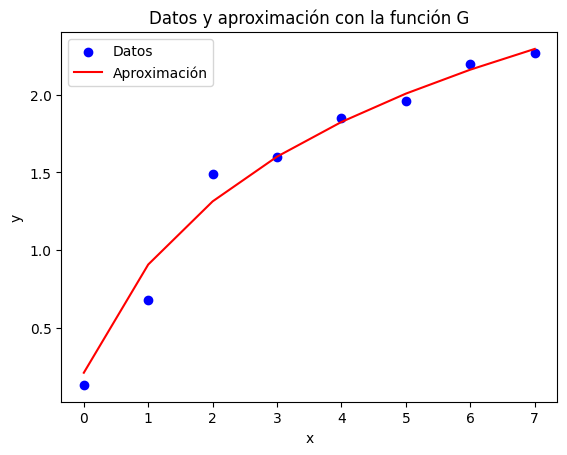

In [ ]:
##Grafico los datos de la tabla y la función de a´proximación
plt.scatter(x, y, label='Datos', color = 'blue')
plt.plot(x, np.log(d[0] + d[1]*x), label='Aproximación', color = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos y aproximación con la función G')
plt.legend()
plt.show()

$c)$ Para calcular cuánto contaminante se espera hallar en el año 8, lo que hago es reemplazar $x = 8$ en mis funciones de aproximación (tener en cuenta que una unidad de $x$ equivale un año; luego, el octavo año es representado por $x = 8$).

In [ ]:
## Calculo cuánto contaminante se espera hallar en el octavo año usando la función F
print(f'El contaminante esperado en el octavo año, en base a la función de aproximación F, es {c[0] + c[1]*8 + c[2]*8**2}')

## Calculo cuánto contaminante se espera hallar en el octavo año usando la función G
print(f'El contaminante esperado en el octavo año, en base a la función de aproximación G, es {np.log(d[0] + d[1]*8)}')

El contaminante esperado en el octavo año, en base a la función de aproximación F, es 2.1139285714285707
El contaminante esperado en el octavo año, en base a la función de aproximación G, es 2.4139415980413745


## Interpolación Polinomial

Supongamos que nos dan $n+1$ puntos $(x_0, y_0), (x_1, y_1),...,(x_n, y_n)$ con $x_i \in \mathbb{R}$ todos distintos entre sí, y queremos encontrar un polinimio de grado a lo sumo $n$ tal que: \
$\hspace{10cm} p(x_i) = y_i \ $ para $i = 0,1,...,n$. \

Este problema se lo conoce como interpolación polinomial.  Lo que buscamos entonces es determinar los coeficientes $c_0, c_1,...,c_n$ del polinomio $p(x) = c_0 + c_1x + c_2x^2 + ... + c_nx^n$, de manera que se cumpla $p(x_i) = y_i$ para cada $i$.

Si escribimos esta condición para cada uno de los puntos, obtenemos un sistema de $n+1$ ecuaciones con $n+1$ incógnitas:

$
\left\{
\begin{array}{l}
c_0 + c_1x_0 + c_2x_0^2 + ... + c_nx_0^n = y_0 \\
c_0 + c_1x_1 + c_2x_1^2 + ... + c_nx_1^n = y_1 \\
. \\
. \\
. \\
c_0 + c_1x_n + c_2x_n^2 + ... + c_nx_n^n = y_n
\end{array}
\right.
$

Esto se puede reescribir como un sistema lineal de la forma $Ac = y$, donde \
$A =
\begin{bmatrix}
1 & x_0 & x_0^2 & . & . & . & x_0^n \\
1 & x_1 & x_1^2 & . & . & . & x_1^n \\
. & . & . &  &  &  &  \\
. & . & . &  &  &  &  \\
. & . & . &  &  &  &  \\
 &  &  &  &  &  &  \\
1 & x_n & x_n^2 & . & . & . & x_n^n
\end{bmatrix}
$, $c = \begin{bmatrix} c_0 \\ c_1 \\ . \\ . \\ . \\ . \\ c_n \end{bmatrix}, \ $    $y = \begin{bmatrix} y_0 \\ y_1 \\ . \\ . \\ . \\ . \\ y_n \end{bmatrix}$

La matriz $A$ que aparece en este sistema se conoce como la matriz de Vandermonde asociada a los puntos $x_0,...,x_n$. Esta matriz tiene una propiedad muy importante: si los $x_i$ son todos distintos, entonces $A$ es inversible, lo que implica que el sistema tendría solución única, y es entonces que existiría un único polinomio de grado $n$ que interpola los $n+1$ puntos dados.

\

A su vez, si quisiéramos un polinomio de grado $k$ que "intente" interpolar a los $n+1$ puntos, entonces lo que deberíamos plantear es análogo a lo anterior, pero esta vez de la matriz de Vandermonde nos quedaremos hasta la $(k+1)$-ésima columna, es decir, tendríamos:  \
$A =
\begin{bmatrix}
1 & x_0 & x_0^2 & . & . & x_0^k \\
1 & x_1 & x_1^2 & . & . & x_1^k \\
. & . & . &  &  &  \\
. & . & . &  &  &  \\
. & . & . &  &  &  \\
 &  &  &  &  & \\
1 & x_n & x_n^2 & . & . & x_n^k
\end{bmatrix} \in \mathbb{R}^{(n+1) \times (k+1)}
$, $c = \begin{bmatrix} c_0 \\ c_1 \\ . \\ . \\ . \\ c_k \end{bmatrix} \in \mathbb{R}^k\ $,    $\ y = \begin{bmatrix} y_0 \\ y_1 \\ . \\ . \\ . \\ . \\ y_n \end{bmatrix}$

\

Y luego, el problema $Ac = y$ se puede solucionar con cualquiera de los métodos de mínimos cuadrados vistos.




### **Ejercicio interpolación polinomial**

Los siguientes datos corresponden a la población argentina (expresada en millones de habitantes):

 | Año            | 1950 | 1960 | 1970 | 1980 | 1990 | 2000 |
|----------------|------|------|------|------|------|------|
| Hab. (millones)| 17   | 20.5 | 23.9 | 27.9 | 32.6 | 36.9 |

Se quiere aproximar los datos con una función $g$ de la forma $g(x) = e^{p(x)}$ con $p$ un polinomio. \
Linealizar el problema y calcular el polinomio de grado 5 que interpola los datos.

### **Resolución ejercicio interpolación polinomial**

Para lograr linealizar, propongo $\tilde{g}(x) = ln(g(x))$; pues entonces queda:

$\tilde{g}(x) = p(x)$ que es lineal sobre la variable $x$.

Busco entonces el polinomio $p$ de la forma $p(x) = c_0 + c_1x + c_2x^2 + c_3x^3 + c_4x^4 + c_5x^5$.

Como tengo seis datos, y busco un polinomio de grado cinco, este es un problema de interpolación polinomial.\
Luego, debo resolver el sistema: $Ac = \tilde{y}$ donde $c = \begin{bmatrix} c_0 \\ . \\ . \\ . \\ c_5 \end{bmatrix}$, $\tilde{y} = \begin{bmatrix} ln(y_1) \\ . \\ . \\ . \\ ln(y_6) \end{bmatrix}$ y $A = \begin{bmatrix} 1 & x_1 & x_1^2 & . & . & . & x_1^5 \\ 1 & x_2 & x_2^2 & . & . & . & x_2^5 \\ . & . & . & . & . & . & .\\ . & . & . & . & . & . & .\\ 1 & x_6 & x_6^2 & . & . & . & x_6^5 \end{bmatrix}$

Para resolver este sistema, uso la función de numpy 'polyfit' que ya internamente maneja problemas de estabilidad y me devuelve los coeficientes del polinomio (otro método podría ser, por ejemplo, volver a utilizar la descomposición QR).

In [ ]:
# Escribo los vectores originales x e y
x = np.array([1950, 1960, 1970, 1980, 1990, 2000])
y = np.array([17, 20.5, 23.9, 27.9, 32.6, 36.9])

# Le aplico logaritmo natural a cada componente del vector y
ln_y = np.log(y)

# Calculo los coeficientes del polinomio que interpola los datos
c = np.polyfit(x, y, deg=5)

# Finalmente, retomo la función original, planteada con el polinomio obtenido.
print(f'La función de la forma g(x) = e^p(x) que mejor aproxima los datos es \n g(x) = e^({c[0]} + {c[1]}x + {c[2]}x^2 + {c[3]}x^3 +{c[4]}x^4 + {c[5]}x^5)')

La función de la forma g(x) = e^p(x) que mejor aproxima los datos es 
 g(x) = e^(-4.99980988784605e-08 + 0.0004899812218385145x + -1.920584143054152x^2 + 3763.7879446472352x^3 +-3687692.919160251x^4 + 1445146855.7592912x^5)


Sin embargo, para aproximar los datos, una función sencilla como una función lineal o cuadrática parecen ser lo suficientemente buenas.

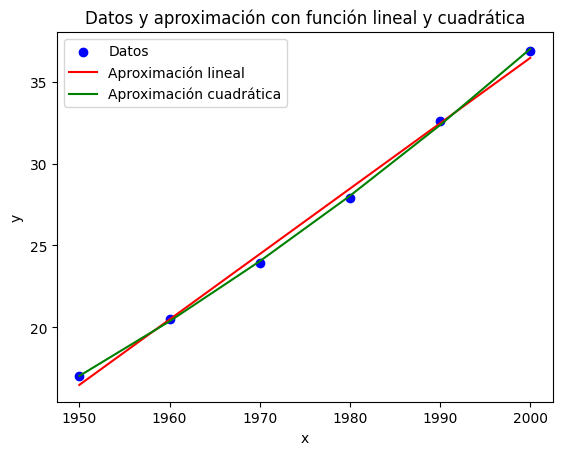

In [ ]:
p_lineal = np.poly1d(coef_lineal)
p_cuadratica = np.poly1d(coef_cuadratica)

plt.scatter(x, y, label='Datos', color='blue')
plt.plot(x, p_lineal(x), label='Aproximación lineal', color='red')
plt.plot(x, p_cuadratica(x), label='Aproximación cuadrática', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos y aproximación con función lineal y cuadrática')
plt.legend()
plt.show()

